## Forecasting

In [4]:
# Import Libraries
import numpy as np
import pandas as pd

In [5]:
# Load Dataset
bike_dataset = r"C:\Users\ikpro\OneDrive\Desktop\Forecasting Models and Time Series for Business in Python\Daily Bike Sharing.csv"

# Convert date column to index
df = pd.read_csv(bike_dataset, index_col = "dteday", parse_dates = True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Selecting the columns to use
data =  df[["cnt", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]]
data.head()

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [7]:
# Renaming column names
data = data.rename(columns = {"cnt":"y"})
data.head()

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


In [8]:
# Index Frequency - Change the frequency from non to Day
data = data.asfreq("D")
data.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

<AxesSubplot:xlabel='dteday'>

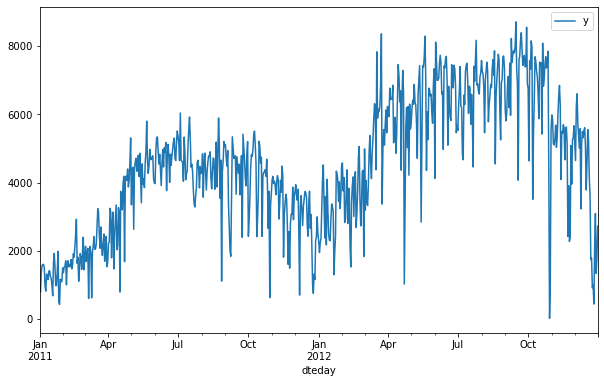

In [9]:
# Visualizaing the Independent Variable
data["y"].plot(figsize=(10,6), legend=True)

In [10]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

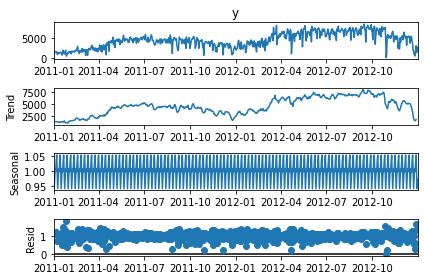

In [11]:
decompose = seasonal_decompose(x=data.y, model="multiplicative")
decompose.plot();

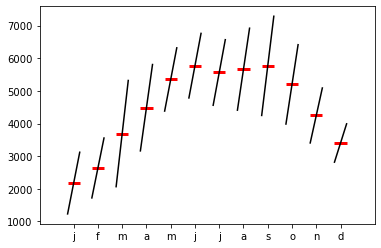

In [12]:
# Seasonaility Grapghs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
# Plotting the groph on by month
month_plot(data.y.resample(rule='MS').mean());

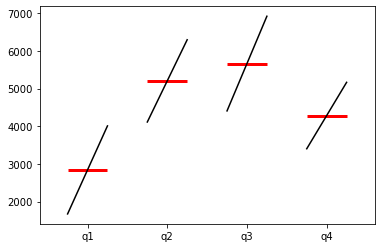

In [13]:
# Plotting the grahs on a quarterly basis
quarter_plot(data.y.resample(rule='Q').mean());

## Holt-Winters for Forecasting - (Also called triple split Exponential Smoothing)
Its is very similar to Exponential Smoothing. Splits the time series into 3 (Level, Trend and Seasonality)
Holt-Winters Exponential Smoothing is used for forecasting time series data that exhibits both a trend and a seasonal variation.

In [20]:
# Training and Test Set
test_days = 31
training_set = data.iloc[: -test_days, :]
test_set = data.iloc[-test_days:, :]
test_set.head()

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-01,5191,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,4649,0,0,2,0.347500,0.359208,0.823333,0.124379
2012-12-03,6234,0,1,1,0.452500,0.455796,0.767500,0.082721
2012-12-04,6606,0,1,1,0.475833,0.469054,0.733750,0.174129
2012-12-05,5729,0,1,1,0.438333,0.428012,0.485000,0.324021


In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
# Forecasting Model
model = ExponentialSmoothing(endog=training_set.y,
                            trend="Mul",
                            seasonal ="Mul",
                            seasonal_periods = 7).fit()

C:\Users\ikpro\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\ikpro\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
# Predictions
predictions_hw = model.forecast(steps=len(test_set)).rename("HW")
predictions_hw.head()

C:\Users\ikpro\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2012-12-01    4703.434234
2012-12-02    4152.109049
2012-12-03    4376.195688
2012-12-04    4211.156937
2012-12-05    4896.528749
Freq: D, Name: HW, dtype: float64

<AxesSubplot:xlabel='dteday'>

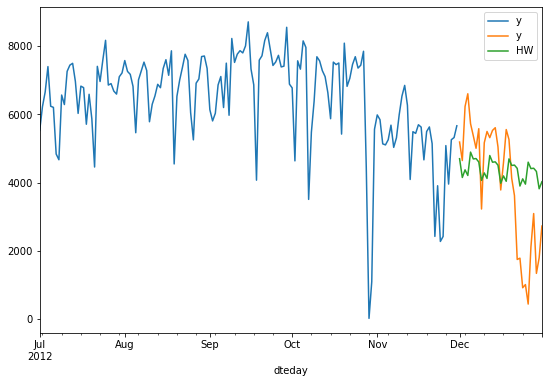

In [25]:
# Visualization
training_set['y']['2012-07-01':].plot(figsize=(9,6), legend=True) #Last six months
test_set['y'].plot(legend=True)
predictions_hw.plot(legend=True)

### Model Assessment
MAE, RMSE & MAPE

In [26]:
# Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
# Mean Squared Error and Root Mean Squared Error
print(round(mean_absolute_error(test_set['y'], predictions_hw), 2))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_hw)), 2))

1389.53
1712.99


In [33]:
# MAPE (Mean Absolute Percent Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true-y_pred)/y_true))*100, 2)

In [34]:
mape(test_set['y'], predictions_hw)

88.14

## Exporting Forecast

In [36]:
predictions_hw.to_csv(r"C:\Users\ikpro\OneDrive\Desktop\Forecasting Models and Time Series for Business in Python\Holt_Winters.csv")

## Challenge - Forecasting Airlines using Holt-Winters

In [83]:
airmiles = r"C:\Users\ikpro\OneDrive\Desktop\Forecasting Models and Time Series for Business in Python\3. Holt-Winters\airmiles.csv"
df_ar = pd.read_csv(airmiles, index_col="Date")
df_ar.head(2)

,airmiles
Date,
1/1/1996,30983174
1/2/1996,32147663


In [84]:
df_ar.index = pd.to_datetime(df_ar.index, format="%d/%m/%Y")
df_ar.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [85]:
df_ar = df_ar.asfreq("MS")
df_ar.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

<AxesSubplot:xlabel='Date'>

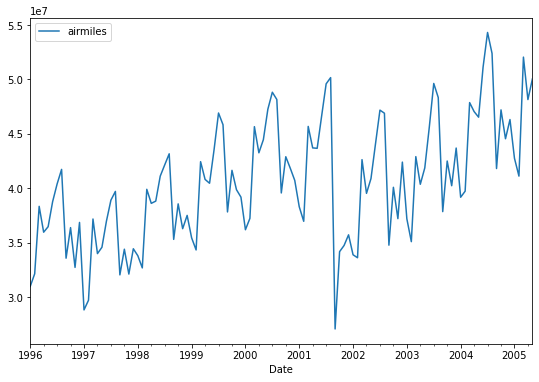

In [87]:
df_ar["airmiles"].plot(figsize=(9,6), legend=True)

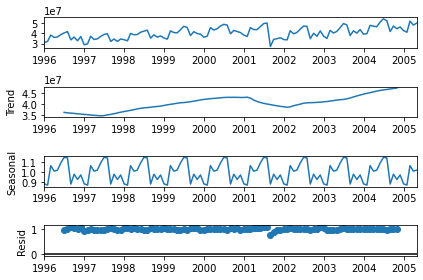

In [88]:
# Seasonal Decomposition
decompose = seasonal_decompose(x=df_ar, model="multiplicative")
decompose.plot();

In [100]:
# Training and Test Set
test_months = 12
training_set = df_ar.iloc[: -test_months, :]
test_set = df_ar.iloc[-test_months:, :]
print(len(training_set))
print(len(test_set))

101
12


In [111]:
# Forecasting Model
model = ExponentialSmoothing(endog=training_set.airmiles,
                            trend="add",
                            seasonal ="mul",
                            seasonal_periods = 12).fit()

C:\Users\ikpro\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\ikpro\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [112]:
# Predictions
predictions_hw = model.forecast(steps=len(test_set)).rename("HW")
predictions_hw.head()

C:\Users\ikpro\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2004-06-01    4.987220e+07
2004-07-01    5.259727e+07
2004-08-01    5.194016e+07
2004-09-01    3.938906e+07
2004-10-01    4.507829e+07
Freq: MS, Name: HW, dtype: float64

<AxesSubplot:xlabel='Date'>

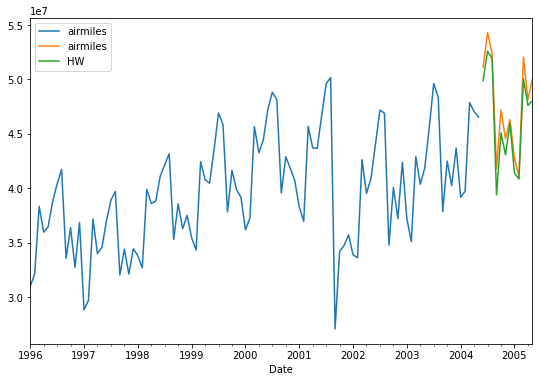

In [113]:
# Visualization
training_set['airmiles'].plot(figsize=(9,6), legend=True) #Last six months
test_set['airmiles'].plot(legend=True)
predictions_hw.plot(legend=True)

In [114]:
# Accuracy Metrics

# Mean Squared Error and Root Mean Squared Error
print(round(mean_absolute_error(test_set['airmiles'], predictions_hw), 2))
print(round(np.sqrt(mean_squared_error(test_set['airmiles'], predictions_hw)), 2))

# MAPE (Mean Absolute Percent Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true-y_pred)/y_true))*100, 2)
print(mape(test_set['airmiles'], predictions_hw))

1333707.39
1520692.89
2.81
